In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import special
import mpmath as mp
#%matplotlib inline

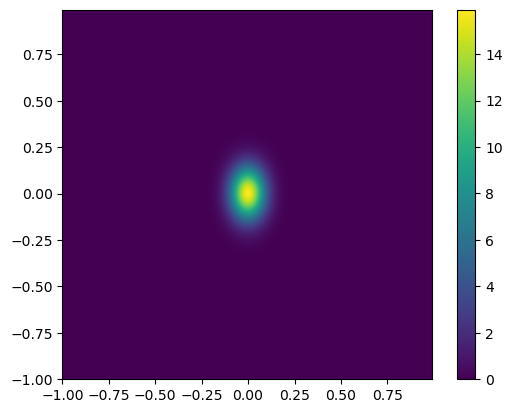

In [3]:
def l_OD_test(x, y):
    sigma = 0.1
    x_0 = 0.
    y_0 = 0.
    z = np.exp(-0.5*((x - x_0*np.ones_like(x))**2 + (1.5**2)*(y - y_0*np.ones_like(y))**2)/sigma**2)/(2*np.pi*sigma**2)
    z = z #- 2*np.exp(-0.5*((x - x_0*np.ones_like(x))**2 + (y - y_0*np.ones_like(y))**2)/sigma**2)/(2*np.pi*sigma**2)
    
    return z

x_data = np.arange(-1, 1, 0.01)
y_data = np.arange(-1, 1, 0.01)

l_OD_data = l_OD_test(x_data[:, None], y_data[None, :])
#very important: set origin = 'lower', otherwise it flips everything!
plt.imshow(l_OD_data, origin='lower',  extent=[x_data.min(), x_data.max(), y_data.min(), y_data.max()])
plt.colorbar()
plt.show()

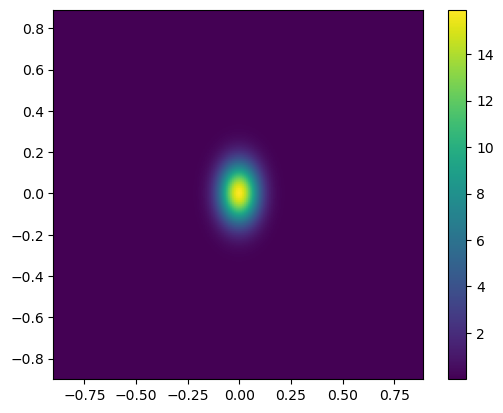

In [4]:
l_OD = scipy.interpolate.RectBivariateSpline(x_data, y_data, l_OD_data)
x = np.arange(-0.9, 0.9, 0.01)
y = np.arange(-0.9, 0.9, 0.01)
def tau(x, y, args):
    x_s, y_s, D = args
    return 0.5*((x - x_s)**2 + (y - y_s)**2)/D + l_OD.ev(x, y)
args = 0, 0, 100
plt.imshow(tau(x[:, None], y[None, :], args), origin='lower',extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.show()


In [5]:
def inv_M(x, y, args):
    x_s, y_s, D = args
    '''h = 0.01
    M_xx = (tau(x + h, y, args) + tau(x - h, y, args) - 2*tau(x, y, args))/h**2
    M_yy = (tau(x, y + h, args) + tau(x, y - h, args) - 2*tau(x, y, args))/h**2
    M_xy = (0.25/h**2)*(tau(x + h, y + h, args) + tau(x - h, y - h, args) - tau(x + h, y - h, args) - tau(x - h, y + h, args))'''
    M_xx = 1/D + l_OD.partial_derivative(2, 0)(x, y)
    M_yy = 1/D + l_OD.partial_derivative(0, 2)(x, y)
    M_xy = 0 + l_OD.partial_derivative(1, 1)(x, y)

    res = np.array([[M_xx, M_xy], [M_xy, M_yy]])
    res = np.transpose(res, (2, 3, 0, 1))
    return res


In [6]:
A = np.zeros([2, 2, np.size(x), np.size(y)])
det_inv_M = np.zeros([np.size(x), np.size(y)])
A = inv_M(x, y, args)
det_inv_M = np.linalg.det(A)
det_inv_M.shape


(180, 180)

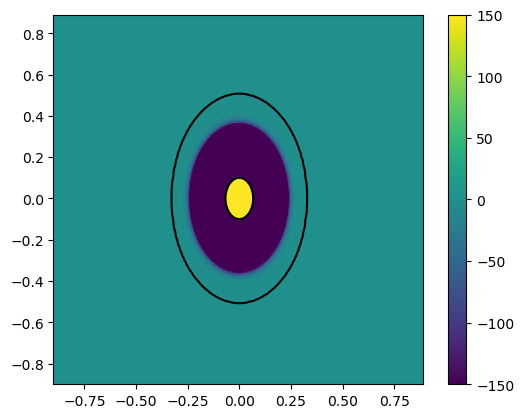

In [7]:
plt.imshow(det_inv_M, origin='lower',extent=[x.min(), x.max(), y.min(), y.max()], vmin = -150, vmax = 150)#np.max(det_inv_M))
plt.colorbar()
X_cr = plt.contour(x, y, det_inv_M, levels = [0], colors = 'k')
plt.show()

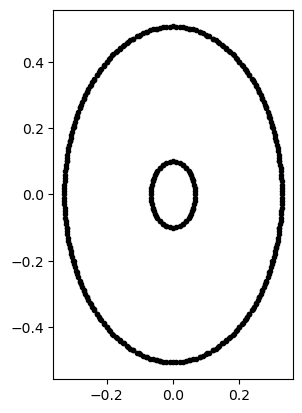

In [8]:
x_cr, y_cr = [], []
i = 0
for path in X_cr.get_paths():
    v = path.vertices
    x_cr.append(v[:, 0])  
    y_cr.append(v[:, 1])  
    #display(v)
    i = i + 1

x_c = np.array(x_cr, dtype=object)
y_c = np.array(y_cr, dtype=object)
plt.scatter(x_cr, y_cr, color = 'k', marker= '.')
plt.gca().set_aspect('equal')
plt.show()

In [9]:
l_OD.partial_derivative(0, 1)(0, 1)

array([[-8.20377749e-44]])

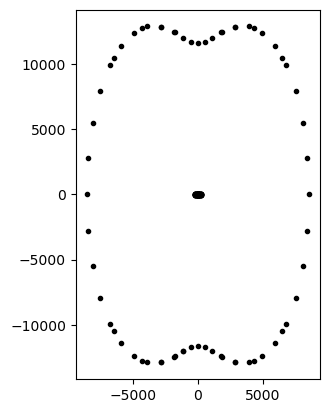

In [10]:
#let's now find the caustics

def find_caustics_scalar(x_cr, y_cr, D):
    x_c = x_cr - D*l_OD.partial_derivative(1, 0)(x_cr, y_cr)
    y_c = y_cr - D*l_OD.partial_derivative(0, 1)(x_cr, y_cr)
    return x_c, y_c 
x_s, y_s, D = args
find_caustics = np.vectorize(find_caustics_scalar)
x_c, y_c = find_caustics(x_cr, y_cr, D)
plt.scatter(x_c, y_c, color = 'k', marker= '.')
plt.gca().set_aspect('equal')

plt.show()